# Online Payment Fraud Detection

# Exploratory Data Analysis ( EDA )


 
 - The onilne payment method leads to fraud that can happen using any payment app. That is why Online Payment app.
    That is why Online Payment Fraud Detection is very important.
        

# This EDA contains the following:

 - How many total transactions are in the dataset, and what is the proportion of fraudulent transactions
 
 - What is the distribution of transaction amounts? Are there any extreme values
 - What are the most common payment methods used in the dataset
 - what are types of oldbalanceorg and newbalanceorg menthod
 - what is the type of isFraud and isFlaggetFraud

# Dataset Description


   - step:   About the transation unit of time
   - type:   type of transaction done
   - amount: the total amount of transaction
   - nameOrg: account that starts the transaction     - oldbalanceOrg: Balance of the account of sender before transaction
   - newbalanceOrg: Balance of the account of sender after transaction
   - nameDest: account that receives the transaction
   - oldbalanceDest: Balance of the account of receiver before transaction
   - newbalanceDest: Balance of the account of receiver after transaction
   - isFraud: The value to be predicted i.e. 0 or 1

## Steps

- Importing libraries


- Read Data


- Data Preprocessing 


- Feature Engineering 

                    
- Model Training

## Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import warnings

warnings.filterwarnings('ignore')

##  Read train data

In [6]:
df=pd.read_csv('E:/Rajalakshmi/PROJECT/file/train/rawtrain.csv')

In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,7,CASH_OUT,413692.19,C1049202430,22680.51,0.00,C93518808,150264.00,0.00,0,0
1,6,PAYMENT,4197.94,C2051611232,20129.00,15931.06,M134963352,0.00,0.00,0,0
2,1,PAYMENT,13310.78,C2095677157,0.00,0.00,M852026681,0.00,0.00,0,0
3,2,PAYMENT,11762.79,C909914828,0.00,0.00,M116650158,0.00,0.00,0,0
4,7,PAYMENT,4736.45,C1160393458,196815.00,192078.55,M766991922,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6994,7,CASH_IN,52429.68,C1904553846,2421260.74,2473690.41,C1882860489,279027.08,226597.40,0,0
6995,7,CASH_OUT,65619.81,C1167627805,0.00,0.00,C1850042097,84362.06,61127.87,0,0
6996,5,PAYMENT,3445.14,C532068603,283795.44,280350.31,M345865414,0.00,0.00,0,0
6997,1,PAYMENT,2380.21,C535352603,6003259.91,6000879.70,M2015261478,0.00,0.00,0,0


## Data Preprocessing 

In [8]:
# To see the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            6999 non-null   int64  
 1   type            6999 non-null   object 
 2   amount          6999 non-null   float64
 3   nameOrig        6999 non-null   object 
 4   oldbalanceOrg   6999 non-null   float64
 5   newbalanceOrig  6999 non-null   float64
 6   nameDest        6999 non-null   object 
 7   oldbalanceDest  6999 non-null   float64
 8   newbalanceDest  6999 non-null   float64
 9   isFraud         6999 non-null   int64  
 10  isFlaggedFraud  6999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 601.6+ KB


In [9]:
#To display the first 10 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,7,CASH_OUT,413692.19,C1049202430,22680.51,0.00,C93518808,150264.0,0.0,0,0
1,6,PAYMENT,4197.94,C2051611232,20129.00,15931.06,M134963352,0.0,0.0,0,0
2,1,PAYMENT,13310.78,C2095677157,0.00,0.00,M852026681,0.0,0.0,0,0
3,2,PAYMENT,11762.79,C909914828,0.00,0.00,M116650158,0.0,0.0,0,0
4,7,PAYMENT,4736.45,C1160393458,196815.00,192078.55,M766991922,0.0,0.0,0,0


In [10]:
#To display the last 10 rows
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6994,7,CASH_IN,52429.68,C1904553846,2421260.74,2473690.41,C1882860489,279027.08,226597.40,0,0
6995,7,CASH_OUT,65619.81,C1167627805,0.00,0.00,C1850042097,84362.06,61127.87,0,0
6996,5,PAYMENT,3445.14,C532068603,283795.44,280350.31,M345865414,0.00,0.00,0,0
6997,1,PAYMENT,2380.21,C535352603,6003259.91,6000879.70,M2015261478,0.00,0.00,0,0
6998,2,PAYMENT,4640.64,C179455108,1023.00,0.00,M1424243710,0.00,0.00,0,0


In [11]:
#check shape of the entire dataframe using .shape attribute
df.shape

(6999, 11)

In [12]:
#To check if there is any null value
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
#To check if there is any nan value in the dataset
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
#To check the duplicate values in the dataset
df.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,7,CASH_OUT,413692.19,C1049202430,22680.51,0.00,C93518808,150264.00,0.00,0,0
1,6,PAYMENT,4197.94,C2051611232,20129.00,15931.06,M134963352,0.00,0.00,0,0
2,1,PAYMENT,13310.78,C2095677157,0.00,0.00,M852026681,0.00,0.00,0,0
3,2,PAYMENT,11762.79,C909914828,0.00,0.00,M116650158,0.00,0.00,0,0
4,7,PAYMENT,4736.45,C1160393458,196815.00,192078.55,M766991922,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6994,7,CASH_IN,52429.68,C1904553846,2421260.74,2473690.41,C1882860489,279027.08,226597.40,0,0
6995,7,CASH_OUT,65619.81,C1167627805,0.00,0.00,C1850042097,84362.06,61127.87,0,0
6996,5,PAYMENT,3445.14,C532068603,283795.44,280350.31,M345865414,0.00,0.00,0,0
6997,1,PAYMENT,2380.21,C535352603,6003259.91,6000879.70,M2015261478,0.00,0.00,0,0


In [15]:
#check shape of the entire dataframe using .shape attribute
df.shape

(6999, 11)

<Axes: >

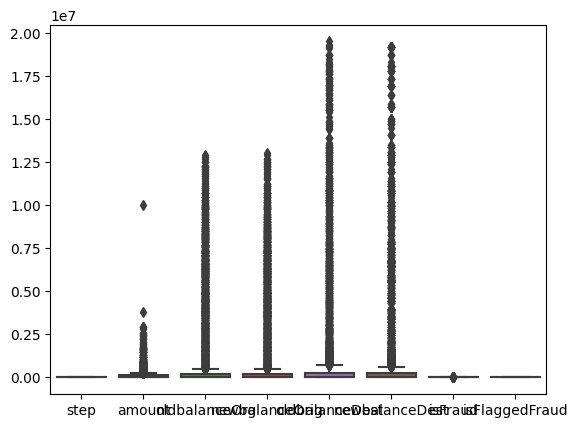

In [16]:
sns.boxplot(df)

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

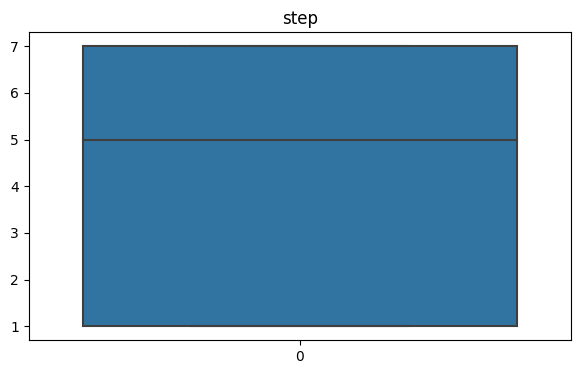

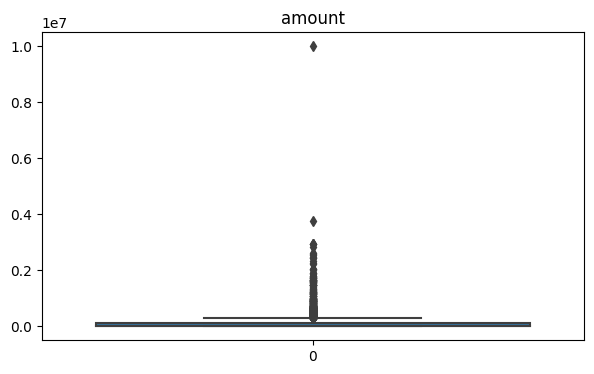

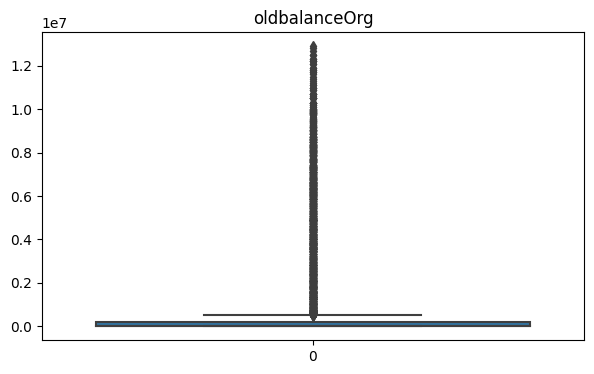

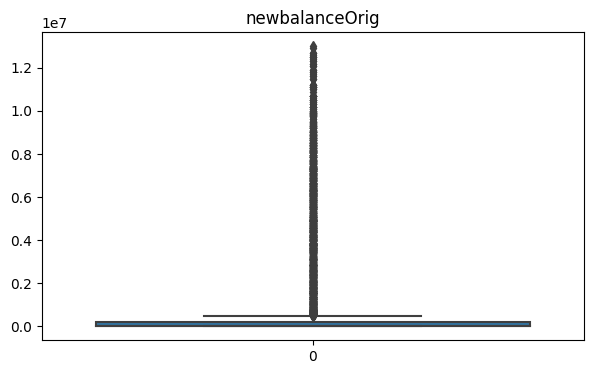

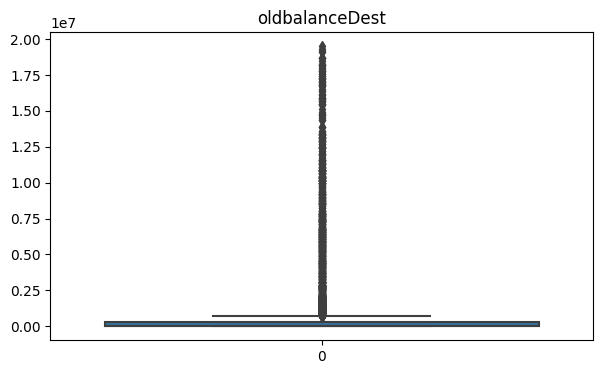

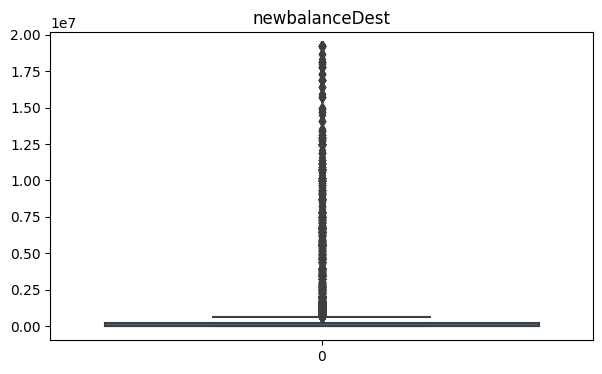

In [18]:
#Using box plot for finding outliers

plt.figure(figsize=(7,4))
sns.boxplot(df['step'])
plt.title('step')

plt.figure(figsize=(7,4))
sns.boxplot(df['amount'])
plt.title('amount')


plt.figure(figsize=(7,4))
sns.boxplot(df['oldbalanceOrg'])
plt.title('oldbalanceOrg')

plt.figure(figsize=(7,4))
sns.boxplot(df['newbalanceOrig'])
plt.title('newbalanceOrig')


plt.figure(figsize=(7,4))
sns.boxplot(df['oldbalanceDest'])
plt.title('oldbalanceDest')

plt.figure(figsize=(7,4))
sns.boxplot(df['newbalanceDest'])
plt.title('newbalanceDest')


plt.show()

In [19]:
#handling outlier in step
q1=df['step'].quantile(0.25)
q3=df['step'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 1.0
q3 = 7.0
IQR = 6.0
lower_range = -8.0
upper_range = 13.0


In [20]:
#capping
df['step']=np.where(df['step']<lower_range,lower_range,
                      np.where(df['step']>upper_range,upper_range,
                      df['step']))
df['step']

0       7.0
1       6.0
2       1.0
3       2.0
4       7.0
       ... 
6994    7.0
6995    7.0
6996    5.0
6997    1.0
6998    2.0
Name: step, Length: 6999, dtype: float64

Text(0.5, 1.0, 'step')

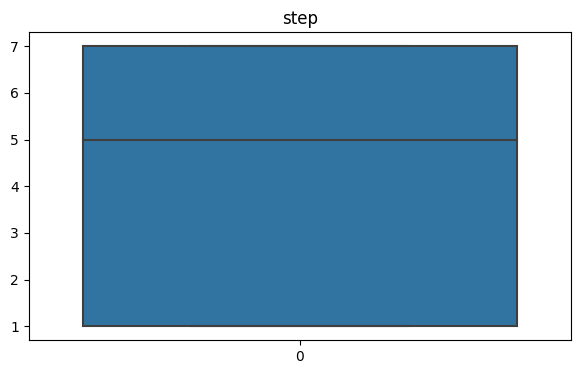

In [21]:
plt.figure(figsize=(7,4))
sns.boxplot(df['step'])
plt.title('step')


In [22]:
#handling outlier in amount
q1=df['amount'].quantile(0.25)
q3=df['amount'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 4382.275
q3 = 116543.39499999999
IQR = 112161.12
lower_range = -163859.405
upper_range = 228704.51499999998


In [23]:
#capping
df['amount']=np.where(df['amount']<lower_range,lower_range,
                      np.where(df['amount']>upper_range,upper_range,
                      df['amount']))
df['amount']

0       228704.515
1         4197.940
2        13310.780
3        11762.790
4         4736.450
           ...    
6994     52429.680
6995     65619.810
6996      3445.140
6997      2380.210
6998      4640.640
Name: amount, Length: 6999, dtype: float64

Text(0.5, 1.0, 'amount')

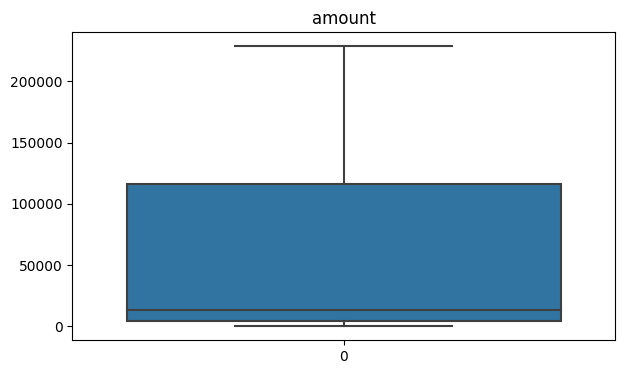

In [24]:
plt.figure(figsize=(7,4))
sns.boxplot(df['amount'])
plt.title('amount')


In [25]:
#handling outlier in oldbalanceOrg
q1=df['oldbalanceOrg'].quantile(0.25)
q3=df['oldbalanceOrg'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 144.0
q3 = 199259.96000000002
IQR = 199115.96000000002
lower_range = -298529.94000000006
upper_range = 398375.92000000004


In [26]:
#capping
df['oldbalanceOrg']=np.where(df['oldbalanceOrg']<lower_range,lower_range,
                      np.where(df['oldbalanceOrg']>upper_range,upper_range,
                      df['oldbalanceOrg']))
df['oldbalanceOrg']

0        22680.51
1        20129.00
2            0.00
3            0.00
4       196815.00
          ...    
6994    398375.92
6995         0.00
6996    283795.44
6997    398375.92
6998      1023.00
Name: oldbalanceOrg, Length: 6999, dtype: float64

Text(0.5, 1.0, 'oldbalanceOrg')

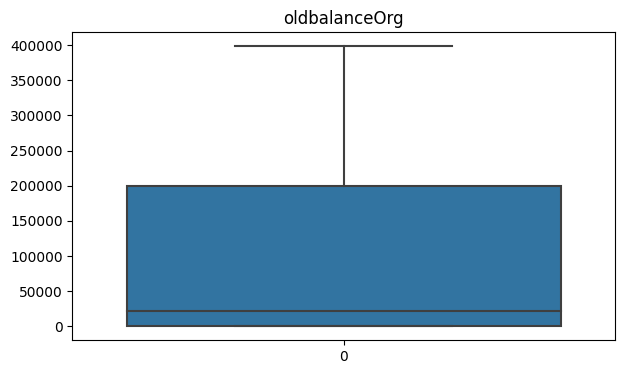

In [27]:
plt.figure(figsize=(7,4))
sns.boxplot(df['oldbalanceOrg'])
plt.title('oldbalanceOrg')

In [28]:
#handling outlier in newbalanceOrig
q1=df['newbalanceOrig'].quantile(0.25)
q3=df['newbalanceOrig'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 197508.19
IQR = 197508.19
lower_range = -296262.28500000003
upper_range = 395016.38


In [29]:
#capping
df['newbalanceOrig']=np.where(df['newbalanceOrig']<lower_range,lower_range,
                      np.where(df['newbalanceOrig']>upper_range,upper_range,
                      df['newbalanceOrig']))
df['newbalanceOrig']

0            0.00
1        15931.06
2            0.00
3            0.00
4       192078.55
          ...    
6994    395016.38
6995         0.00
6996    280350.31
6997    395016.38
6998         0.00
Name: newbalanceOrig, Length: 6999, dtype: float64

Text(0.5, 1.0, 'newbalanceOrig')

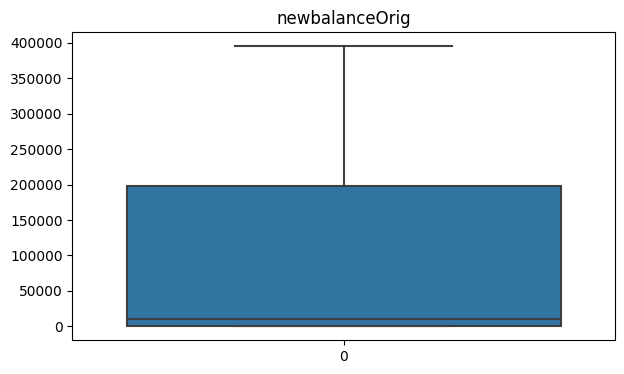

In [30]:
plt.figure(figsize=(7,4))
sns.boxplot(df['newbalanceOrig'])
plt.title('newbalanceOrig')

In [31]:
#handling outlier in oldbalanceDest
q1=df['oldbalanceDest'].quantile(0.25)
q3=df['oldbalanceDest'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 281656.015
IQR = 281656.015
lower_range = -422484.0225
upper_range = 563312.03


In [32]:
#capping
df['oldbalanceDest']=np.where(df['oldbalanceDest']<lower_range,lower_range,
                      np.where(df['oldbalanceDest']>upper_range,upper_range,
                      df['oldbalanceDest']))
df['oldbalanceDest']

0       150264.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
6994    279027.08
6995     84362.06
6996         0.00
6997         0.00
6998         0.00
Name: oldbalanceDest, Length: 6999, dtype: float64

Text(0.5, 1.0, 'oldbalanceDest')

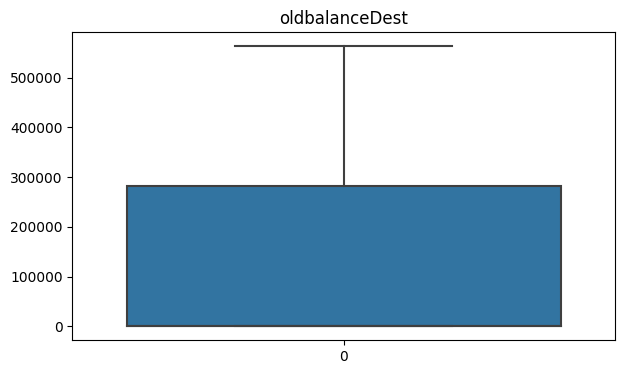

In [33]:
plt.figure(figsize=(7,4))
sns.boxplot(df['oldbalanceDest'])
plt.title('oldbalanceDest')

In [34]:
#handling outlier in newbalanceDest
q1=df['newbalanceDest'].quantile(0.25)
q3=df['newbalanceDest'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 246635.85
IQR = 246635.85
lower_range = -369953.775
upper_range = 493271.7


In [35]:
#capping
df['newbalanceDest']=np.where(df['newbalanceDest']<lower_range,lower_range,
                      np.where(df['newbalanceDest']>upper_range,upper_range,
                      df['newbalanceDest']))
df['newbalanceDest']

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
6994    226597.40
6995     61127.87
6996         0.00
6997         0.00
6998         0.00
Name: newbalanceDest, Length: 6999, dtype: float64

Text(0.5, 1.0, 'newbalanceDest')

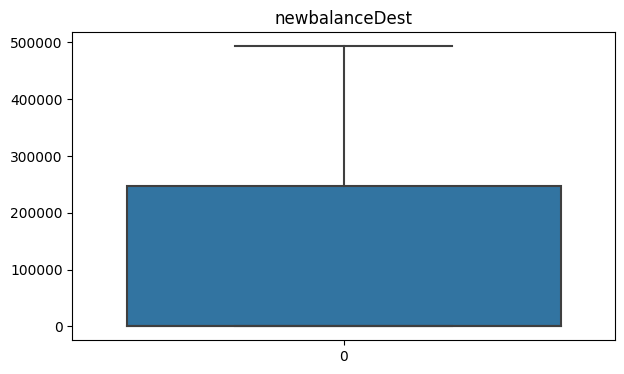

In [36]:
plt.figure(figsize=(7,4))
sns.boxplot(df['newbalanceDest'])
plt.title('newbalanceDest')

# Exploratory Data Analysis ( EDA )

1.How many total transactions are in the dataset, and what is the proportion of fraudulent transactions?

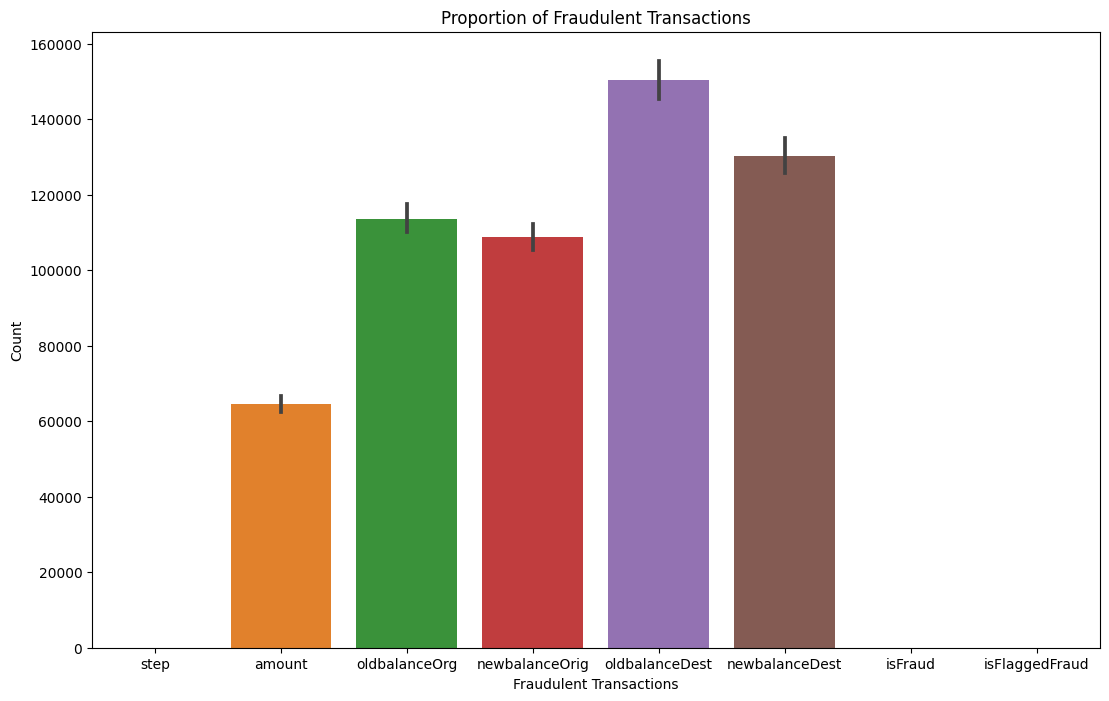

In [38]:
plt.figure(figsize=(13,8))
sns.barplot(df)
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Count')
plt.title('Proportion of Fraudulent Transactions')
plt.show()

2. What is the distribution of transaction amounts? Are there any extreme values?

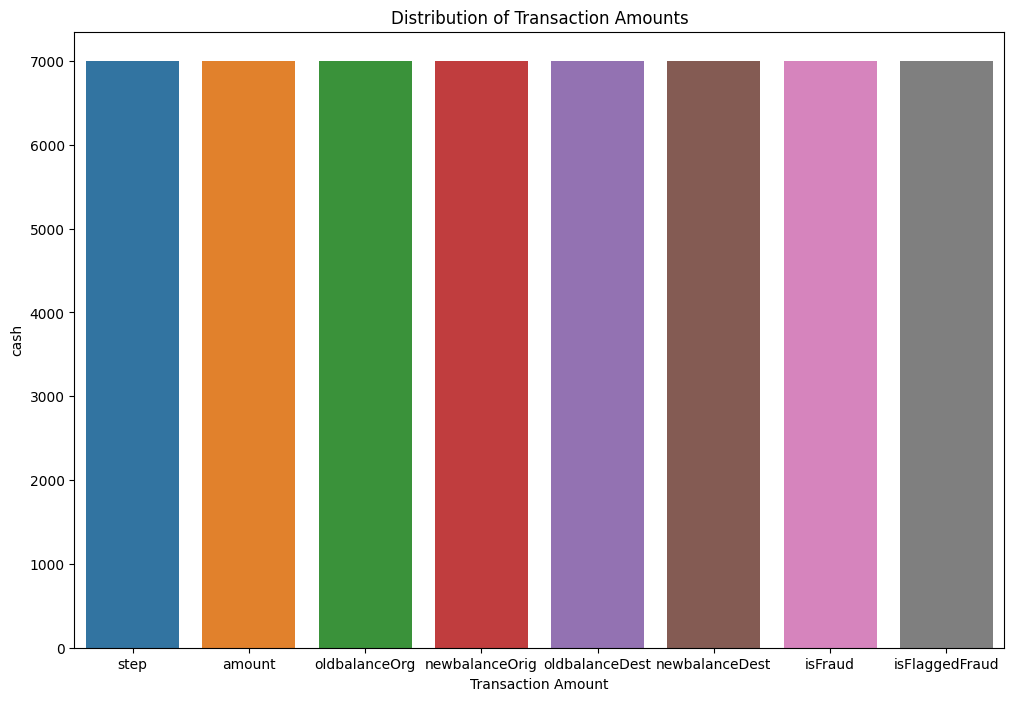

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(df)
plt.xlabel('Transaction Amount')
plt.ylabel('cash')
plt.title('Distribution of Transaction Amounts')
plt.show()

3.What are the most common payment methods used in the dataset?

<Figure size 2000x2000 with 0 Axes>

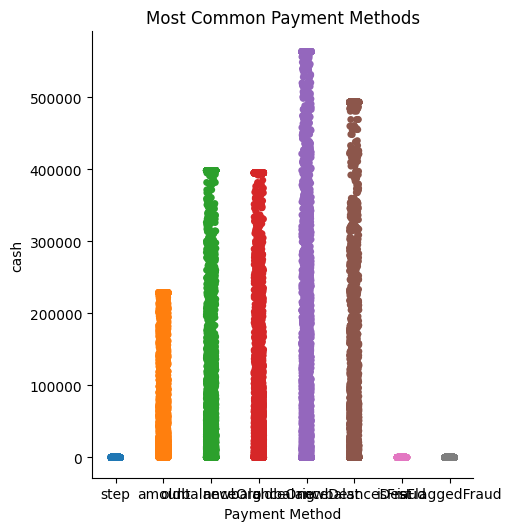

In [57]:
plt.figure(figsize=(20,20))
sns.catplot(df)
plt.xlabel('Payment Method')
plt.ylabel('cash')
plt.title('Most Common Payment Methods')
plt.show()

4.what are types of oldbalanceorg and newbalanceorg menthod?

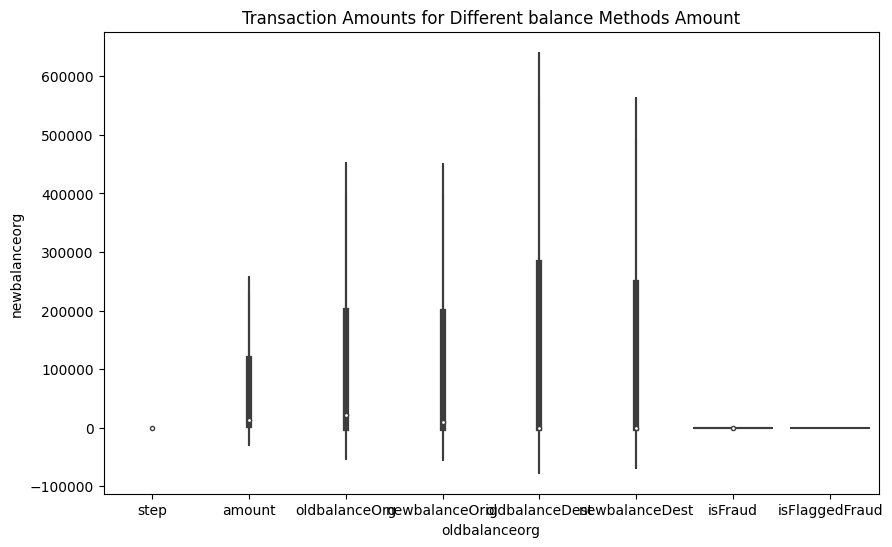

In [65]:
plt.figure(figsize=(10, 6))
sns.violinplot(df)
plt.xlabel('oldbalanceorg')
plt.ylabel('newbalanceorg')
plt.title('Transaction Amounts for Different balance Methods Amount')
plt.show()

5.what is the type of isFraud and isFlaggetFraud?

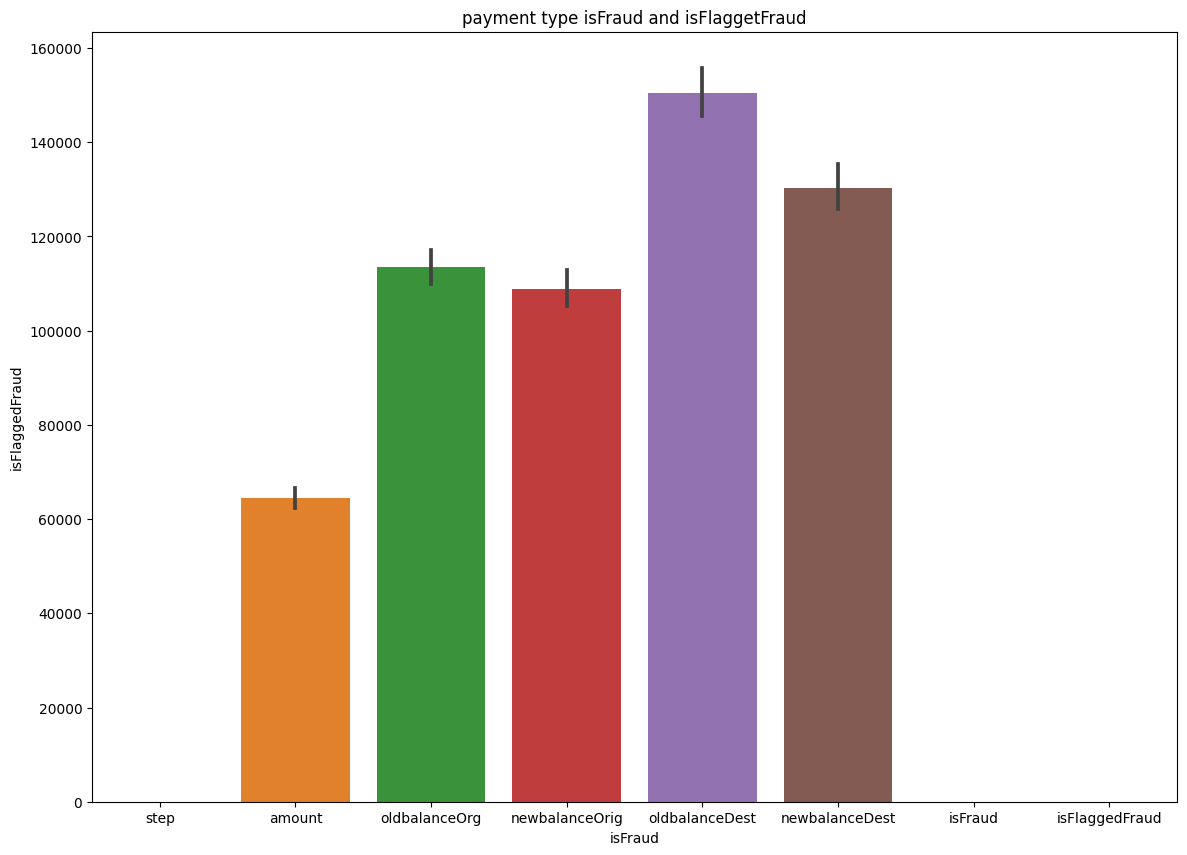

In [70]:
plt.figure(figsize=(14,10))
sns.barplot(df)
plt.xlabel('isFraud')
plt.ylabel('isFlaggedFraud')
plt.title('payment type isFraud and isFlaggetFraud')
plt.show()

<Axes: ylabel='Frequency'>

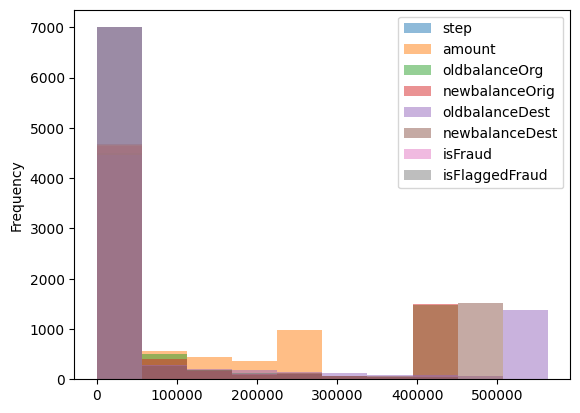

In [71]:
df.plot.hist(alpha=0.5)